# Mollweide projection

In [1]:
import os
import sys
import numpy as np

import seaborn as sns
import matplotlib as mpl
import matplotlib.cm as cmap
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
data = './data/'
out = './output/'

### Just some matplotlib and seaborn parameter tuning

In [3]:
axistitlesize = 20
axisticksize = 17
axislabelsize = 26
axislegendsize = 23
axistextsize = 20
axiscbarfontsize = 15

# Set axtick dimensions
major_size = 6
major_width = 1.2
minor_size = 3
minor_width = 1
mpl.rcParams['xtick.major.size'] = major_size
mpl.rcParams['xtick.major.width'] = major_width
mpl.rcParams['xtick.minor.size'] = minor_size
mpl.rcParams['xtick.minor.width'] = minor_width
mpl.rcParams['ytick.major.size'] = major_size
mpl.rcParams['ytick.major.width'] = major_width
mpl.rcParams['ytick.minor.size'] = minor_size
mpl.rcParams['ytick.minor.width'] = minor_width

mpl.rcParams.update({'figure.autolayout': False})

# Seaborn style settings
sns.set_style({'axes.axisbelow': True,
               'axes.edgecolor': '.8',
               'axes.facecolor': 'white',
               'axes.grid': True,
               'axes.labelcolor': '.15',
               'axes.spines.bottom': True,
               'axes.spines.left': True,
               'axes.spines.right': True,
               'axes.spines.top': True,
               'figure.facecolor': 'white',
               'font.family': ['sans-serif'],
               'font.sans-serif': ['Arial',
                'DejaVu Sans',
                'Liberation Sans',
                'Bitstream Vera Sans',
                'sans-serif'],
               'grid.color': '.8',
               'grid.linestyle': '--',
               'image.cmap': 'rocket',
               'lines.solid_capstyle': 'round',
               'patch.edgecolor': 'w',
               'patch.force_edgecolor': True,
               'text.color': '.15',
               'xtick.bottom': True,
               'xtick.color': '.15',
               'xtick.direction': 'in',
               'xtick.top': True,
               'ytick.color': '.15',
               'ytick.direction': 'in',
               'ytick.left': True,
               'ytick.right': True})

# Colorpalettes, colormaps, etc.
sns.set_palette(palette='rocket')

In [4]:
# Variables to set up the size of the map
## Number of pixels in the longer linear dimension.
## Since we are using lots of FFTs this should be a factor of 2^N
N = 2**10
# Variables to set up the map plots
c_min = -300     # Minimum for color bar
c_max = 300      # Maximum for color bar
X_width = 360     # Horizontal map width in degrees
Y_width = 180     # Vertical map width in degrees

# Pixel number along axes
N_x = N if X_width > Y_width else N // (Y_width//X_width)
N_y = N if X_width < Y_width else N // (X_width//Y_width)
pix_size  = (X_width/N_x) * 60 # Size of a pixel in arcminutes

In [5]:
# Make a 2D Mollweide coordinate system
X = np.linspace(-np.pi, np.pi, N_x)
Y = np.linspace(-np.pi/2, np.pi/2, N_y)
X, Y = np.meshgrid(X, Y)
# Radial component `R`
R = 2 * np.arcsin(np.sqrt(np.sin(X/2)**2 + np.cos(X) * np.sin(Y/2)**2))
R = (np.sqrt(pix_size)/2) / np.max(R) * R

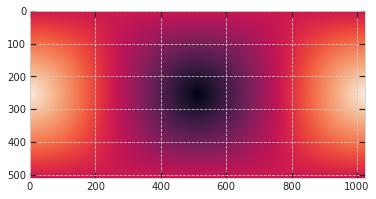

In [6]:
plt.imshow(R)

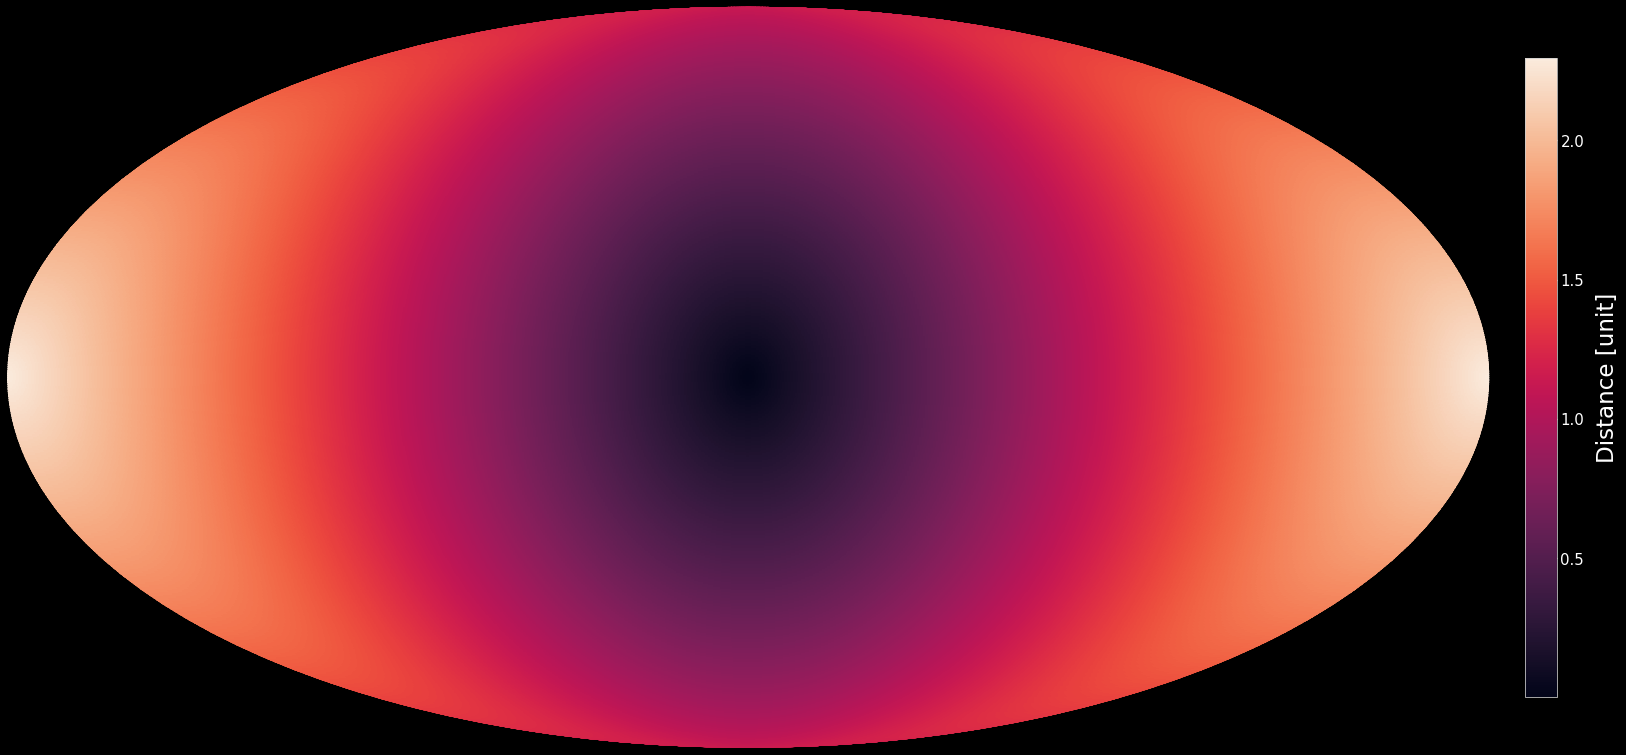

In [7]:
save = False
fig, axes = plt.subplots(figsize=(2*16, 16),
                         facecolor='black', subplot_kw={'projection' : 'mollweide',
                                                        'facecolor' : 'black'})
axes.axis('off')

im = axes.pcolormesh(X, Y[::-1], R,
                     shading='auto')

# Create an axis on the right side of `axes`. The width of `cax` will be 2%
# of `axes` and the padding between `cax` and axes will be fixed at 0.1 inch
cbar = plt.colorbar(mappable=im, shrink=0.735, pad=0.02)#, cax=cax)
cbar.ax.tick_params(labelsize=axiscbarfontsize, colors='white')
cbar.set_label('Distance [unit]', color='white',
               fontsize=axiscbarfontsize+8, rotation=90, labelpad=12)

if save:
    plt.savefig(out + 'angular_dist.png',
                format='png', dpi=200,
                facecolor='black', edgecolor='black',
                bbox_inches='tight')

plt.show()